In [146]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop,Adam
import cv2
import os
import glob
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
# path = r"E:\Data Science\AI4icps\Dataset_Healthcare-20230326T173742Z-001\Dataset_Healthcare\train\train images"

In [17]:
# for img in os.listdir(path):
#     img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
# doesn't work

In [101]:
# E:\Data Science\AI4icps\Dataset_Healthcare-20230401T133423Z-001\Dataset_Healthcare\train\train images resized
images = [cv2.imread(file) for file in glob.glob("E:/Data Science/AI4icps/Dataset_Healthcare-20230401T133423Z-001/Dataset_Healthcare/train/new train with extra/*.png")]

In [118]:
images.shape

(11508, 256, 256, 3)

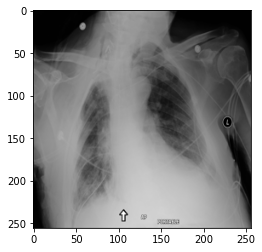

In [102]:
plt.imshow(images[1])

In [172]:
plt.plot(model.history.history['accuracy'], label = 'training_accuracy')
plt.show()

KeyError: 'accuracy'

In [168]:
truth

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP
...,...,...,...,...,...,...
111005,00030801_001.png,Mass|Pneumonia,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA


In [ ]:
plt.bar

In [66]:
# for i in range(len(images)):
#     images[i] = images[i]/255
# doesn't work

In [103]:
images = np.array(images)

In [104]:
img_normalized = cv2.normalize(images, None, 0, 1.0,
cv2.NORM_MINMAX, dtype=cv2.CV_32F)


In [106]:
img_normalized[1]

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01568628, 0

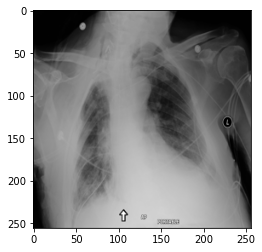

In [107]:
plt.imshow(img_normalized[1])

In [25]:
# images = [cv2.imread(file) for file in glob.glob("E:\Data Science\AI4icps\Dataset_Healthcare-20230326T173742Z-001\Dataset_Healthcare\train\train images\*.png")]

KeyboardInterrupt: 

In [108]:
# type(image_names)
image_names = os.listdir(r'E:\Data Science\AI4icps\Dataset_Healthcare-20230401T133423Z-001\Dataset_Healthcare\train\new train with extra')

In [135]:
truth = pd.read_csv('Ground_Truth.csv')

In [136]:
hmm = pd.DataFrame({'Image Index' :image_names})

In [137]:
df = pd.merge(hmm, truth, how = 'left', on ='Image Index')

In [138]:
df

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248.0,87.0,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248.0,87.0,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248.0,87.0,M,AP
3,00000248_008.png,Atelectasis,248.0,87.0,M,AP
4,00000248_009.png,Atelectasis,248.0,87.0,M,AP
...,...,...,...,...,...,...
11503,00003923_009.png,Effusion|Infiltration,3923.0,27.0,M,AP
11504,00003923_010.png,Effusion|Infiltration,3923.0,27.0,M,AP
11505,00003923_011.png,Infiltration,3923.0,27.0,M,AP
11506,00003923_012.png,No Finding,3923.0,27.0,M,AP


In [9]:
# images_norm = []
# for i in range(len(images)):
#     images_norm.append(images[i]/255)

In [10]:
# # Create a list of image names
# image_names = os.listdir(r'E:\Data Science\AI4icps\Dataset_Healthcare-20230326T173742Z-001\Dataset_Healthcare\train\train images')

# # Create an empty dataframe
# df = pd.DataFrame()

# # Loop through each image name
# for name in image_names:
#     # Open the image using PIL
#     img = Image.open('E:/Data Science/AI4icps/Dataset_Healthcare-20230326T173742Z-001/Dataset_Healthcare/train/train images/' + name)
#     # Convert the image to a numpy array
#     img_arr = np.array(img)
#     # Create a dataframe with the image array
#     img_df = pd.DataFrame({'image_array': [img_arr]})
#     # Add the image dataframe to the main dataframe
#     df = pd.concat([df, img_df], ignore_index=True)

# # Add the image names to the dataframe
# df['image_name'] = image_names

In [11]:
# df_merge = pd.merge(truth, df, how = 'left')

In [113]:
# Define mapping dictionary
mapping_dict = {'No Finding': 0}

# Use replace() method to replace "no finding" values with 0
df['Finding Labels'] = df['Finding Labels'].replace(mapping_dict)

# Use apply() method to map all other values to 1
df['Finding Labels'] = df['Finding Labels'].apply(lambda x: 1 if x != 0 else x)

In [114]:
img_normalized.shape

(11508, 256, 256, 3)

In [115]:
X_train = img_normalized
y_train = df['Finding Labels']

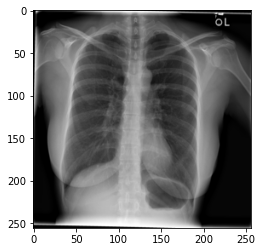

In [29]:
plt.imshow(X_train[4000])

In [85]:
X_train = np.array(X_train)

MemoryError: Unable to allocate 93.8 GiB for an array with shape (4001, 1024, 1024, 3) and data type float64

In [66]:
df[df['Image Index'] =='00030801_001.png']

,image_array,Image Index


In [30]:
# df_merge.isna().sum()

NameError: name 'df_merge' is not defined

In [111]:
# df_merge = df_merge.dropna(subset =['image_array'])

In [116]:
# df_non = df_merge[df_merge['Finding Labels'] == 'No Finding']

In [127]:
# y_train = X_train['Finding Labels']

In [131]:
# Define the optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

C:\Users\risha\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [38]:
# model.compile(optimizer = RMSprop(lr = 1e-4) , loss = "binary_crossentropy", metrics=["accuracy"])

C:\Users\risha\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [31]:
# model.summary()

In [40]:
# model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
126/126 [==============================] - 271s 2s/step - loss: 0.8998 - accuracy: 0.4189
Epoch 2/10
126/126 [==============================] - 277s 2s/step - loss: 0.6793 - accuracy: 0.4189
Epoch 3/10
126/126 [==============================] - 273s 2s/step - loss: 0.6742 - accuracy: 0.4189
Epoch 4/10
126/126 [==============================] - 265s 2s/step - loss: 0.6667 - accuracy: 0.4189
Epoch 5/10
126/126 [==============================] - 1648s 13s/step - loss: 0.6647 - accuracy: 0.4189
Epoch 6/10
126/126 [==============================] - 263s 2s/step - loss: 0.6663 - accuracy: 0.4189
Epoch 7/10
126/126 [==============================] - 270s 2s/step - loss: 0.6626 - accuracy: 0.4189
Epoch 8/10
126/126 [==============================] - 277s 2s/step - loss: 0.6617 - accuracy: 0.4189
Epoch 9/10
126/126 [==============================] - 274s 2s/step - loss: 0.6570 - accuracy: 0.4189
Epoch 10/10
126/126 [==============================] - 266s 2s/step - loss: 0.6536 - accu

In [21]:
X_train = X_train.reshape(-1, 1024, 1024, 1)

In [116]:
X_train.shape

(11508, 256, 256, 3)

In [37]:
# model = Sequential()
# #
# model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (512,512,3)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))



# #
# model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))
# # fully connected
# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation = "softmax"))

In [74]:
# # Define the new width and height for the resized images
# new_width = 500
# new_height = 500

# # Set the directory path for the input folder
# input_dir = 'E:/Data Science/AI4icps/Dataset_Healthcare-20230326T173742Z-001/Dataset_Healthcare/train/train images'

# # Create an empty list to store the resized image arrays
# resized_image_array_list = []

# # Iterate through each file in the input directory
# for filename in os.listdir(input_dir):
#     # Open the image file using Pillow
#     image = Image.open(os.path.join(input_dir, filename)).convert('L')

#     # Resize the image to the new dimensions
#     resized_image = image.resize((new_width, new_height))

#     # Convert the resized image to a numpy array
#     resized_image_array = np.array(resized_image)

#     # Add the resized image array to the list
#     resized_image_array_list.append(resized_image_array)

In [78]:
X_train.shape

(4011, 256, 256, 3)

In [83]:
# images_test

In [80]:
# test
images_test = [cv2.imread(file) for file in glob.glob("E:/Data Science/AI4icps/Dataset_Healthcare-20230401T133423Z-001/Dataset_Healthcare/test/test images resized/*.png")]

In [35]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (256,256,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [185]:
# current model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (256,256,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # add dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # add dropout layer
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5)) # add dropout layer
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5)) # add dropout layer
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [187]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 64)       

In [154]:
model.compile(optimizer = 'adam', loss= "binary_crossentropy", metrics=["acc"])

In [155]:
X_train.shape

(11508, 256, 256, 3)

In [156]:
y_train.shape

(11508,)

In [174]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
  6/360 [..............................] - ETA: 7:08 - loss: 0.4681 - acc: 0.7760

KeyboardInterrupt: 

In [48]:
image_names_test = os.listdir(r'E:\Data Science\AI4icps\Dataset_Healthcare-20230401T133423Z-001\Dataset_Healthcare\test\test images resized')

In [49]:
images_test = [cv2.imread(file) for file in glob.glob("E:/Data Science/AI4icps/Dataset_Healthcare-20230401T133423Z-001/Dataset_Healthcare/test/test images resized/*.png")]

In [50]:
image_test = np.array(images_test)

In [51]:
test_normalized = cv2.normalize(image_test, None, 0, 1.0,
cv2.NORM_MINMAX, dtype=cv2.CV_32F)

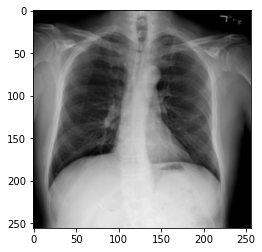

In [158]:
plt.imshow(test_normalized[100])

In [88]:
test_normalized.shape

(998, 256, 256, 3)

In [159]:
predictions = model.predict(test_normalized)

32/32 [==============================] - 7s 182ms/step


In [160]:
predictions = pd.Series(predictions.flatten())

In [162]:
predictions.value_counts()

0.234793    1
0.755089    1
0.661894    1
0.438112    1
0.433448    1
           ..
0.367407    1
0.476548    1
0.806071    1
0.297355    1
0.909083    1
Length: 998, dtype: int64

In [163]:
f = lambda x: 0 if x < 0.5 else 1


In [164]:
predictions = predictions.apply(f)

In [165]:
predictions.value_counts()

0    578
1    420
dtype: int64

In [166]:
hmm = pd.DataFrame({'Image Index' : image_names_test, 'Finding Labels': predictions})

In [167]:
hmm.to_csv('my_data.csv', index=False)

In [132]:
hmm

,Image Index,Finding Labels
0,00000001_000.png,0
1,00000001_001.png,0
2,00000001_002.png,1
3,00000002_000.png,1
4,00000003_003.png,1
...,...,...
993,00000248_000.png,1
994,00000248_001.png,1
995,00000248_002.png,0
996,00000248_003.png,1


In [43]:
predictions.shape

(1006,)

In [44]:
len(image_names_test)

1006

In [ ]:

train_datagen=ImageDataGenerator(rescale=1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='Image Index',
    y_col='Label',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=40,
    interpolation='nearest',
    validate_filenames=True,
    follow_links=False,
    x_col_mapping={
        'Image Index':'Image Index',
        'Patient Age':'Patient Age',
        'PA':'PA',
        'M':'M'
    }
)

val_generator=train_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='Image Index',
    y_col='Label',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=40,
    interpolation='nearest',
    validate_filenames=True,
    follow_links=False,
    x_col_mapping={
        'Image Index':'Image Index',
        'Patient Age':'Patient Age',
        'PA':'PA',
        'M':'M'
    }
)

In [ ]:
# multi input cnn

ground_truth_arr = np.array(truth)
`

In [140]:
structured_data = df.iloc[:,3:6]

In [149]:
df['Patient Gender'].nunique()

3

In [188]:
cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten()
])
# model = Sequential()
# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu', input_shape = (256,256,3)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(64, activation = "relu"))
# model.add(Dense(1, activation = "sigmoid"))

# Define the fully connected network for structured data processing
structured_nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(structured_data.shape[1],)),
    layers.Dense(32, activation='relu')
])

# Merge the two networks using the Concatenate layer
merge_layer = layers.Concatenate()([cnn.output, structured_nn.output])

# Define the final layers for the Multi-Input CNN
final_layer = layers.Dense(1, activation='sigmoid')(merge_layer)

# Create the Multi-Input CNN model
multi_input_model = keras.models.Model(inputs=[cnn.input, structured_nn.input], outputs=final_layer)

# Compile the Multi-Input CNN model
multi_input_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Multi-Input CNN model
# multi_input_model.fit([image_data, df[['age', 'gender', 'view_position']]], image_data.labels, epochs=10, batch_size=32)

In [147]:
le = LabelEncoder()
df['Patient Gender'] = le.fit_transform(df['Patient Gender'])
df['View Position'] = le.fit_transform(df['View Position'])

In [189]:
multi_input_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_14_input (InputLayer)   [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 254, 254, 32  896         ['conv2d_14_input[0][0]']        
                                )                                                                 
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 127, 127, 32  0          ['conv2d_14[0][0]']              
 )                              )                                                           

In [152]:
multi_input_model.fit([X_train, df[['Patient Age', 'Patient Gender', 'View Position']]], y_train, epochs = 5, batch_size = 32)

Epoch 1/5
360/360 [==============================] - 320s 888ms/step - loss: nan - accuracy: 0.5939
Epoch 2/5
360/360 [==============================] - 305s 846ms/step - loss: nan - accuracy: 0.5939
Epoch 3/5
360/360 [==============================] - 300s 834ms/step - loss: nan - accuracy: 0.5939
Epoch 4/5
  5/360 [..............................] - ETA: 4:56 - loss: nan - accuracy: 0.5688

KeyboardInterrupt: 

In [173]:
acc = history.history['acc']

NameError: name 'history' is not defined

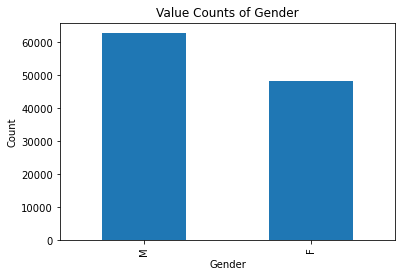

In [175]:
counts = truth['Patient Gender'].value_counts()

# plot the counts as a bar plot
counts.plot.bar()
plt.title('Value Counts of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [176]:
truth_1 = truth.copy()

In [177]:
truth_1

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP
...,...,...,...,...,...,...
111005,00030801_001.png,Mass|Pneumonia,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA


In [178]:
# Define mapping dictionary
mapping_dict = {'No Finding': 0}

# Use replace() method to replace "no finding" values with 0
truth_1['Finding Labels'] = truth_1['Finding Labels'].replace(mapping_dict)

# Use apply() method to map all other values to 1
truth_1['Finding Labels'] = truth_1['Finding Labels'].apply(lambda x: 1 if x != 0 else x)

In [179]:
truth_1['Finding Labels'].value_counts()

0    59932
1    51078
Name: Finding Labels, dtype: int64

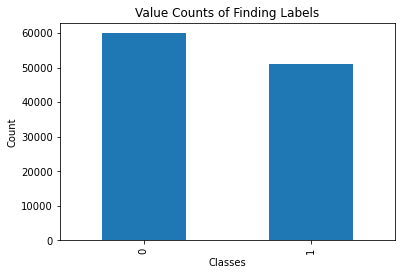

In [183]:
counts = truth_1['Finding Labels'].value_counts()

# plot the counts as a bar plot
counts.plot.bar()
plt.title('Value Counts of Finding Labels')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()